Importing the Libraries

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

Data Collection and Processing 

In [83]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('Gold_Data.csv')

In [84]:
# print first 5 rows in the dataframe
gold_data.head()

,Date,Adj_Close,Close,High,Low,Open,Volume
0,2000-08-30 00:00:00+00:00,273.899994,273.899994,273.899994,273.899994,273.899994,0
1,2000-08-31 00:00:00+00:00,278.299988,278.299988,278.299988,274.799988,274.799988,0
2,2000-09-01 00:00:00+00:00,277.000000,277.000000,277.000000,277.000000,277.000000,0
3,2000-09-05 00:00:00+00:00,275.799988,275.799988,275.799988,275.799988,275.799988,2
4,2000-09-06 00:00:00+00:00,274.200012,274.200012,274.200012,274.200012,274.200012,0


In [85]:
# print last 5 rows of the dataframe
gold_data.tail()

,Date,Adj_Close,Close,High,Low,Open,Volume
6059,2024-10-24 00:00:00+00:00,2734.899902,2734.899902,2736.100098,2729.000000,2729.000000,27
6060,2024-10-25 00:00:00+00:00,2740.899902,2740.899902,2742.399902,2725.500000,2725.500000,29
6061,2024-10-28 00:00:00+00:00,2742.899902,2742.899902,2742.899902,2729.500000,2736.100098,56
6062,2024-10-29 00:00:00+00:00,2768.399902,2768.399902,2768.399902,2768.399902,2768.399902,848
6063,2024-10-30 00:00:00+00:00,2788.500000,2788.500000,2789.000000,2774.600098,2774.600098,231


In [86]:
# number of rows and columns
gold_data.shape

(6064, 7)

In [87]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6064 entries, 0 to 6063
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6064 non-null   object 
 1   Adj_Close  6064 non-null   float64
 2   Close      6064 non-null   float64
 3   High       6064 non-null   float64
 4   Low        6064 non-null   float64
 5   Open       6064 non-null   float64
 6   Volume     6064 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 331.8+ KB


In [88]:
# checking the number of missing values
gold_data.isnull().sum()

Date         0
Adj_Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [89]:
# getting the statistical measures of the data
gold_data.describe()

,Adj_Close,Close,High,Low,Open,Volume
count,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000,6064.000000
mean,1150.724818,1150.724818,1156.481085,1144.814528,1150.766623,4262.785455
std,569.143985,569.143985,572.181256,565.977679,569.078431,24284.937764
min,255.100006,255.100006,256.100006,255.000000,255.000000,0.000000
25%,628.274994,628.274994,630.875000,626.000000,628.700012,20.000000
50%,1231.199951,1231.199951,1237.450012,1226.049988,1231.049988,105.000000
75%,1605.024963,1605.024963,1614.274994,1592.724976,1604.999969,395.000000
max,2788.500000,2788.500000,2789.000000,2774.600098,2774.600098,386334.000000


Correlation:
     1. Positive Correlation
     2. Negative Correlation

In [91]:
#Converting data string into float
gold_data['Date'] = pd.to_datetime(gold_data['Date'])
print(gold_data)

                          Date    Adj_Close        Close         High  \
0    2000-08-30 00:00:00+00:00   273.899994   273.899994   273.899994   
1    2000-08-31 00:00:00+00:00   278.299988   278.299988   278.299988   
2    2000-09-01 00:00:00+00:00   277.000000   277.000000   277.000000   
3    2000-09-05 00:00:00+00:00   275.799988   275.799988   275.799988   
4    2000-09-06 00:00:00+00:00   274.200012   274.200012   274.200012   
...                        ...          ...          ...          ...   
6059 2024-10-24 00:00:00+00:00  2734.899902  2734.899902  2736.100098   
6060 2024-10-25 00:00:00+00:00  2740.899902  2740.899902  2742.399902   
6061 2024-10-28 00:00:00+00:00  2742.899902  2742.899902  2742.899902   
6062 2024-10-29 00:00:00+00:00  2768.399902  2768.399902  2768.399902   
6063 2024-10-30 00:00:00+00:00  2788.500000  2788.500000  2789.000000   

              Low         Open  Volume  
0      273.899994   273.899994       0  
1      274.799988   274.799988       0  


In [92]:
correlation = gold_data.corr()

<Axes: >

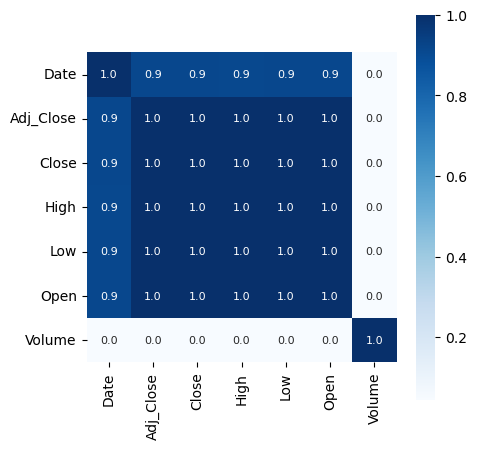

In [93]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (5,5))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [94]:
# correlation values of Adj_Close
print(correlation['Adj_Close'])

Date         0.914525
Adj_Close    1.000000
Close        1.000000
High         0.999886
Low          0.999911
Open         0.999797
Volume       0.045000
Name: Adj_Close, dtype: float64


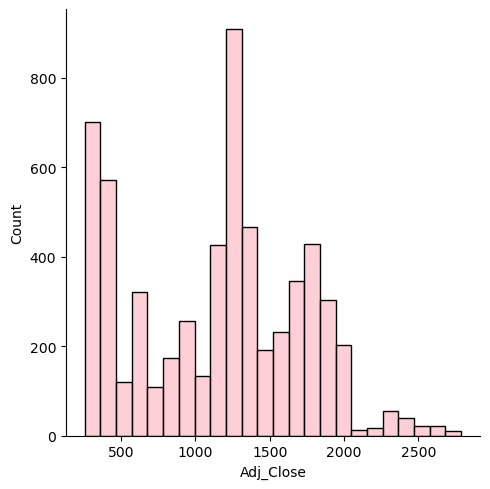

In [95]:
# checking the distribution of the Adj_Close Price
sns.displot(gold_data['Adj_Close'],color='pink')

Splitting the Features and Target

In [97]:
X = gold_data.drop(['Date','Adj_Close'],axis=1)
Y = gold_data['Adj_Close']

In [98]:
print(X)

            Close         High          Low         Open  Volume
0      273.899994   273.899994   273.899994   273.899994       0
1      278.299988   278.299988   274.799988   274.799988       0
2      277.000000   277.000000   277.000000   277.000000       0
3      275.799988   275.799988   275.799988   275.799988       2
4      274.200012   274.200012   274.200012   274.200012       0
...           ...          ...          ...          ...     ...
6059  2734.899902  2736.100098  2729.000000  2729.000000      27
6060  2740.899902  2742.399902  2725.500000  2725.500000      29
6061  2742.899902  2742.899902  2729.500000  2736.100098      56
6062  2768.399902  2768.399902  2768.399902  2768.399902     848
6063  2788.500000  2789.000000  2774.600098  2774.600098     231

[6064 rows x 5 columns]


In [99]:
print(Y)

0        273.899994
1        278.299988
2        277.000000
3        275.799988
4        274.200012
           ...     
6059    2734.899902
6060    2740.899902
6061    2742.899902
6062    2768.399902
6063    2788.500000
Name: Adj_Close, Length: 6064, dtype: float64


Splitting into Training Data and Test Data

In [101]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

Model Training : Random Forest Regressor

In [103]:
regressor = RandomForestRegressor(n_estimators=100)

In [104]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

Model Evaluation

In [106]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [107]:
print(test_data_prediction)

[1508.05201059  427.44799957 1229.11699852 ...  273.79399658 1233.59798492
 1056.82999746]


In [108]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9999964241664631


Comparing Actual Values and Predicted Values in a plot

In [110]:
Y_test = list(Y_test)

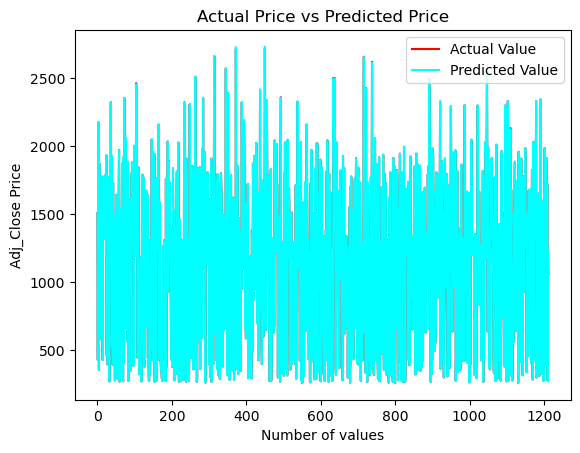

In [111]:
plt.plot(Y_test, color='red', label = 'Actual Value')
plt.plot(test_data_prediction, color='cyan', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('Adj_Close Price')
plt.legend()
plt.show()